# Table of Content

### 0. Loading the libraries and the data

### 1. Exploratory Data Analysis
#### 1.1 Dataset and goal descriptions
#### 1.2 A quick look at the data
#### 1.3 Checking to see if there are any null values
#### 1.4 Looking at the numerical variables
#### 1.5 Looking at categorical variables
#### 1.6 Combining variables for a better understanding
     A. Salaries level and promotions compared to leaving rates
     B. Satisfaction and leaving rates
     C. Departments, work accidents and leaving rates
     D. Evaluations and leaving rates
     E. Number of projects and time spent at the company to leaving rates
     F. Average monthly hours worked and leaving rates
#### 1.6.1 The preliminary examination's main take aways
#### 1.7 The variables' correlation
#### 1.8 Outlier detection

### 2. Data Preparation
#### 2.1 Refactoring to the proper data types
     A. The variable salary
     B. The variable sales (departments)
#### 2.2 Fixing scales and skewness
     A. Scaling with MinMaxScaler
     B. A solution for the skeweness (from the Dataset library)
#### 2.3 Spliting into train and test: Cross Validation approach
     A. Building the dataframes we will use in the baseline model
     B. Setting the dataset into X and y
     C. Cross-Validation approach

### 3. Baseline Model

### 4. Feature Engineering
#### 4.1 Feature Creation 
     A. Average hours per project
     B. Satisfaction / Time spent in the company
     C. Adding the 2 newly created features together
#### 4.2 Outlier Removals
#### 4.3 Feature selection
     A. Stepwise Selection: Forward Selection
     B. Stepwise Selection: Backward Elimination
     C. Stepwise Selection: Bi-directional elimination 
     D. Recursive Feature Elimination
     E. Conclusions on the Feature Selection Process
#### 4.4 Binning and Clustering to create combinations
     A. Binning First
     B. Clustering
    
## 5. Final metric
## 6. Interpretation




# 0. Loading the libraries and the data

The libraries and packages used in the following code are:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisers import EqualWidthDiscretiser
from sklearn.cluster import KMeans
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.pipeline import make_pipeline
from sklearn_pandas import DataFrameMapper
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from matplotlib.gridspec import GridSpec
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)


The data used is imported from my desktop but can be found here: https://www.kaggle.com/lnvardanyan/hr-analytics

In [3]:
data=pd.read_csv("/Users/mohamedkhanafer/Desktop/ML Assignment/turnover.csv")

# 1. Exploratory Data Analysis

### 1.1 Dataset and goal descriptions

The dataset explored here is the HR Analytics dataset. It includes explanatory variables of around 15,000 employees of a large company.

The explanatory variables are the following:

- **satisfaction_level**: The level of each employee's satisfaction
- **last_evaluation**: The rating from last rating
- **number_project**: The number of projects the employee worked
- **average_montly_hours**: The monthly average hours worked
- **time_spend_company**: The number of years of work in the company
- **work_accident**: If the employee had a working accident (0 = No and 1 = Yes)
- **left**: If the employee left the company or not (0 = Yes and 1 = No)
- **promotion_last_5years**: If the employee has had a promotion in the last 5 years (0 = Yes and 1 = No)
- **sales**: The department to which the employee belongs to
- **salary**: The category of the employee's salary (either Low, Medium or High)


The goal here is to model the probability of attrition (employees leaving, either on their own or because they got fired) of each individual, as well as to understand which variables are the most important ones and need to be addressed right away.

To be able to build a predictive model on this data, we first start a thorough exploration of the data in the coming sections of the EDA.

### 1.2 A quick look at the data

In [6]:
data.sample(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
6167,0.50,0.59,3,260,3,0,0,0,IT,medium
13462,0.78,0.50,5,247,4,0,0,0,product_mng,medium
2370,0.12,0.55,5,242,4,0,0,0,marketing,medium


From the quick glance at the data, the main take aways would be:
   - The data has 10 columns
   - We have 5 numerical variables, 3 boolean variables, and 2 categorical ones.

### 1.3 Checking to see if there are any null values

In [8]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

From the missing value perspective, the data seems clean with no missing values for all fields.

### 1.4 Looking at the numerical variables

In [9]:
numerical= data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]
numerical.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


With those informative statistics in mind, it helps to visualize these various variables:

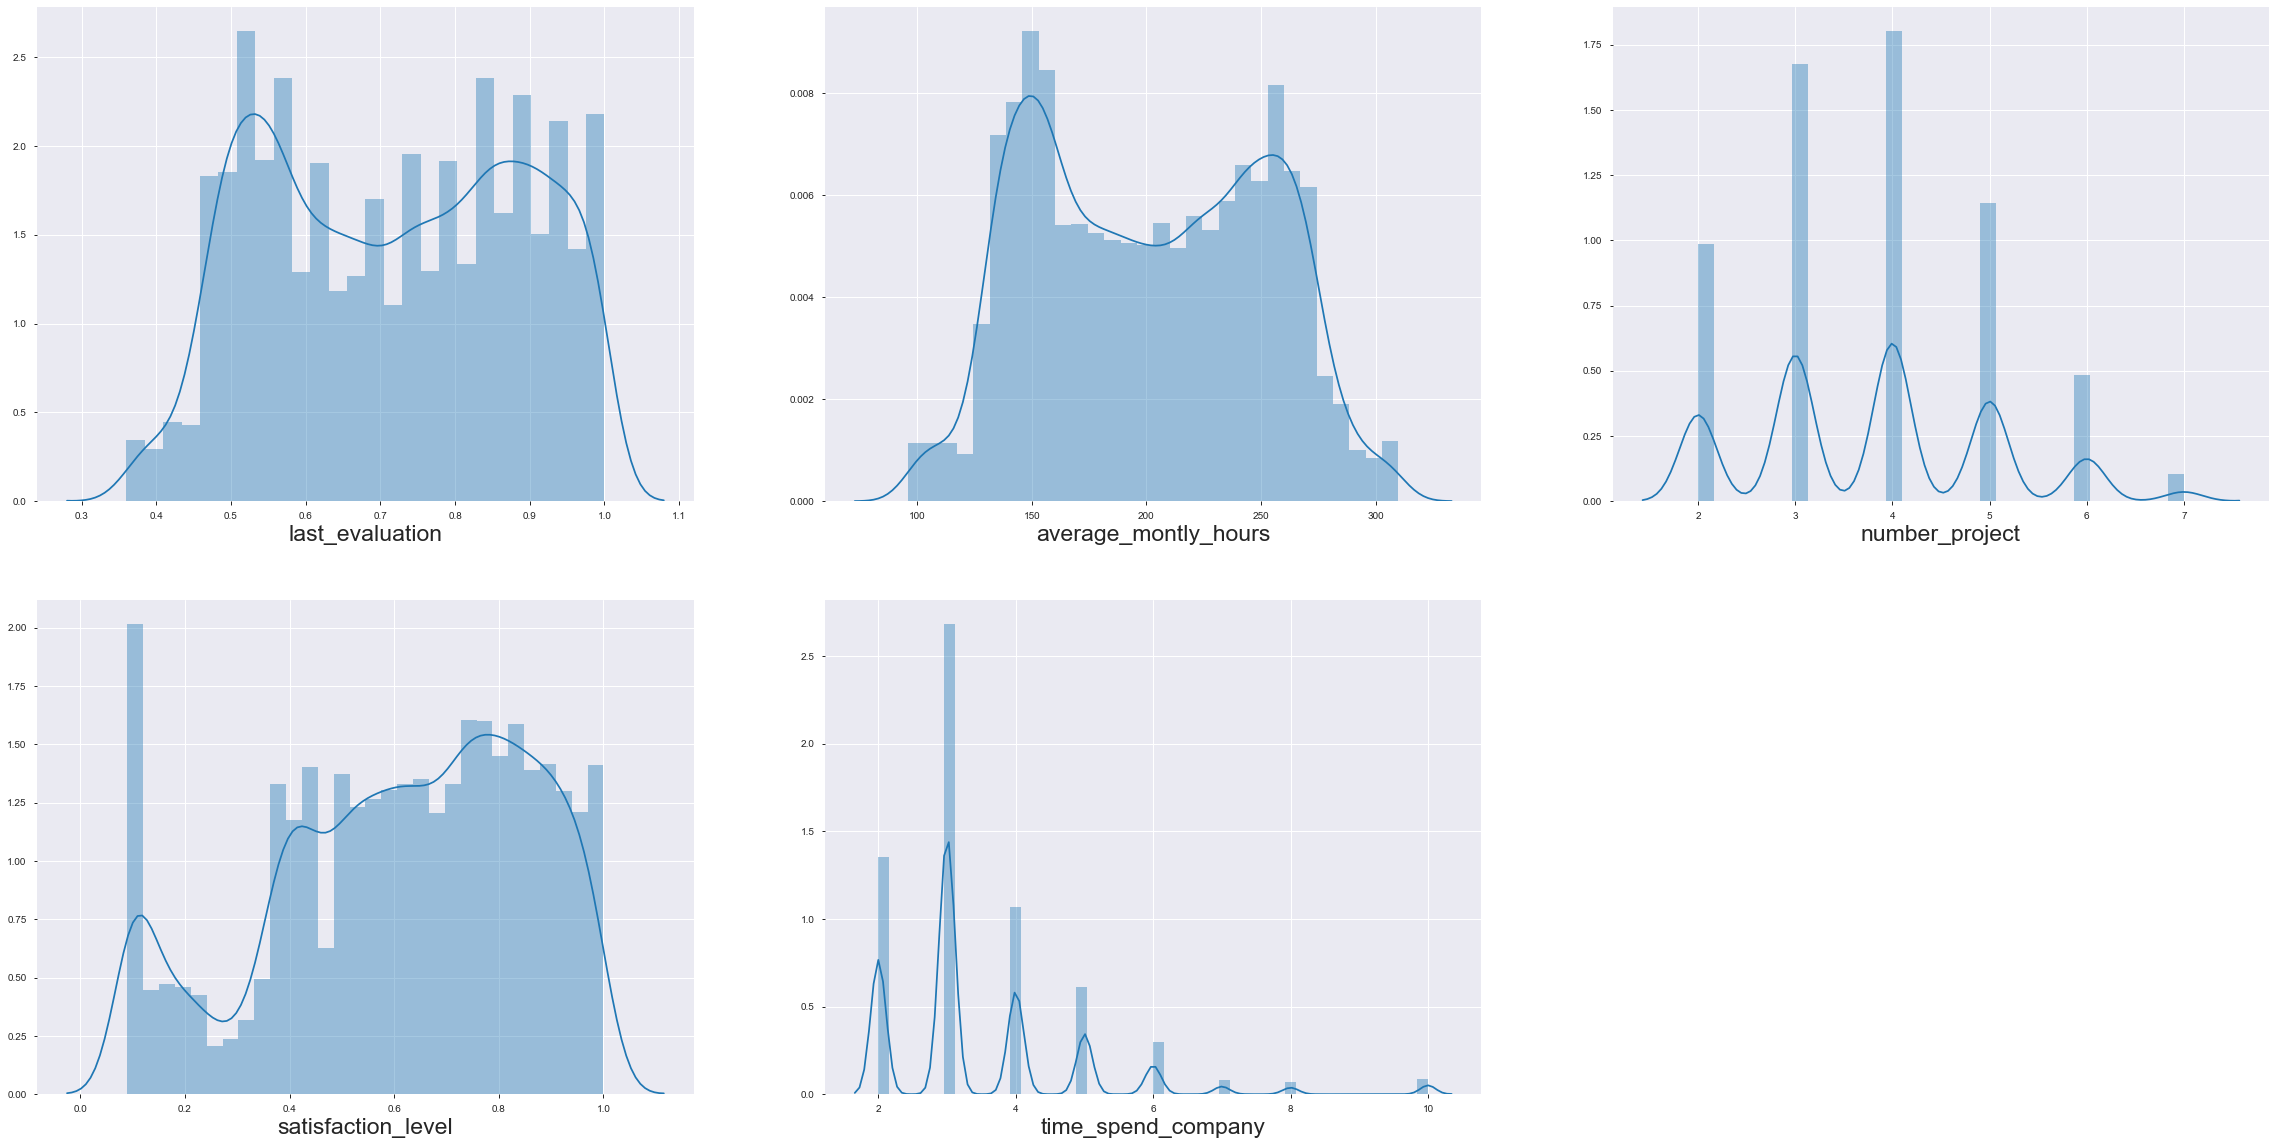

In [10]:
fig = plt.figure(figsize = (40,20))
ax1 = fig.add_subplot(2,3,1)
sns.distplot(numerical["last_evaluation"],ax=ax1)
ax1.set_xlabel("last_evaluation",fontsize=23)
ax2 = fig.add_subplot(2,3,2)
sns.distplot(numerical["average_montly_hours"],ax=ax2)
ax2.set_xlabel("average_montly_hours",fontsize=23)
ax3 = fig.add_subplot(2,3,3)
sns.distplot(numerical["number_project"],ax=ax3)
ax3.set_xlabel("number_project",fontsize=23)
ax4 = fig.add_subplot(2,3,4)
sns.distplot(numerical["satisfaction_level"],ax=ax4)
ax4.set_xlabel("satisfaction_level",fontsize=23)
ax5 = fig.add_subplot(2,3,5)
sns.distplot(numerical["time_spend_company"],ax=ax5)
ax5.set_xlabel("time_spend_company",fontsize=23);

The main insights here to keep in mind:

- It looks like the average monthly hours worked and the last evaluation of the employees have a bimodal distribution;
- Employees work on at least 2 projects;
- There seem to be an important proportion of employees not very satisfied in the company;
- The time spent at the company has a right skewed distribution.

With these distributions in mind, it will be useful later on to combine them with the categorical variables in graphs. It can be interesting to see the relations of the distributions with for instance if the employee left or not. 

### 1.5 Looking at categorical variables

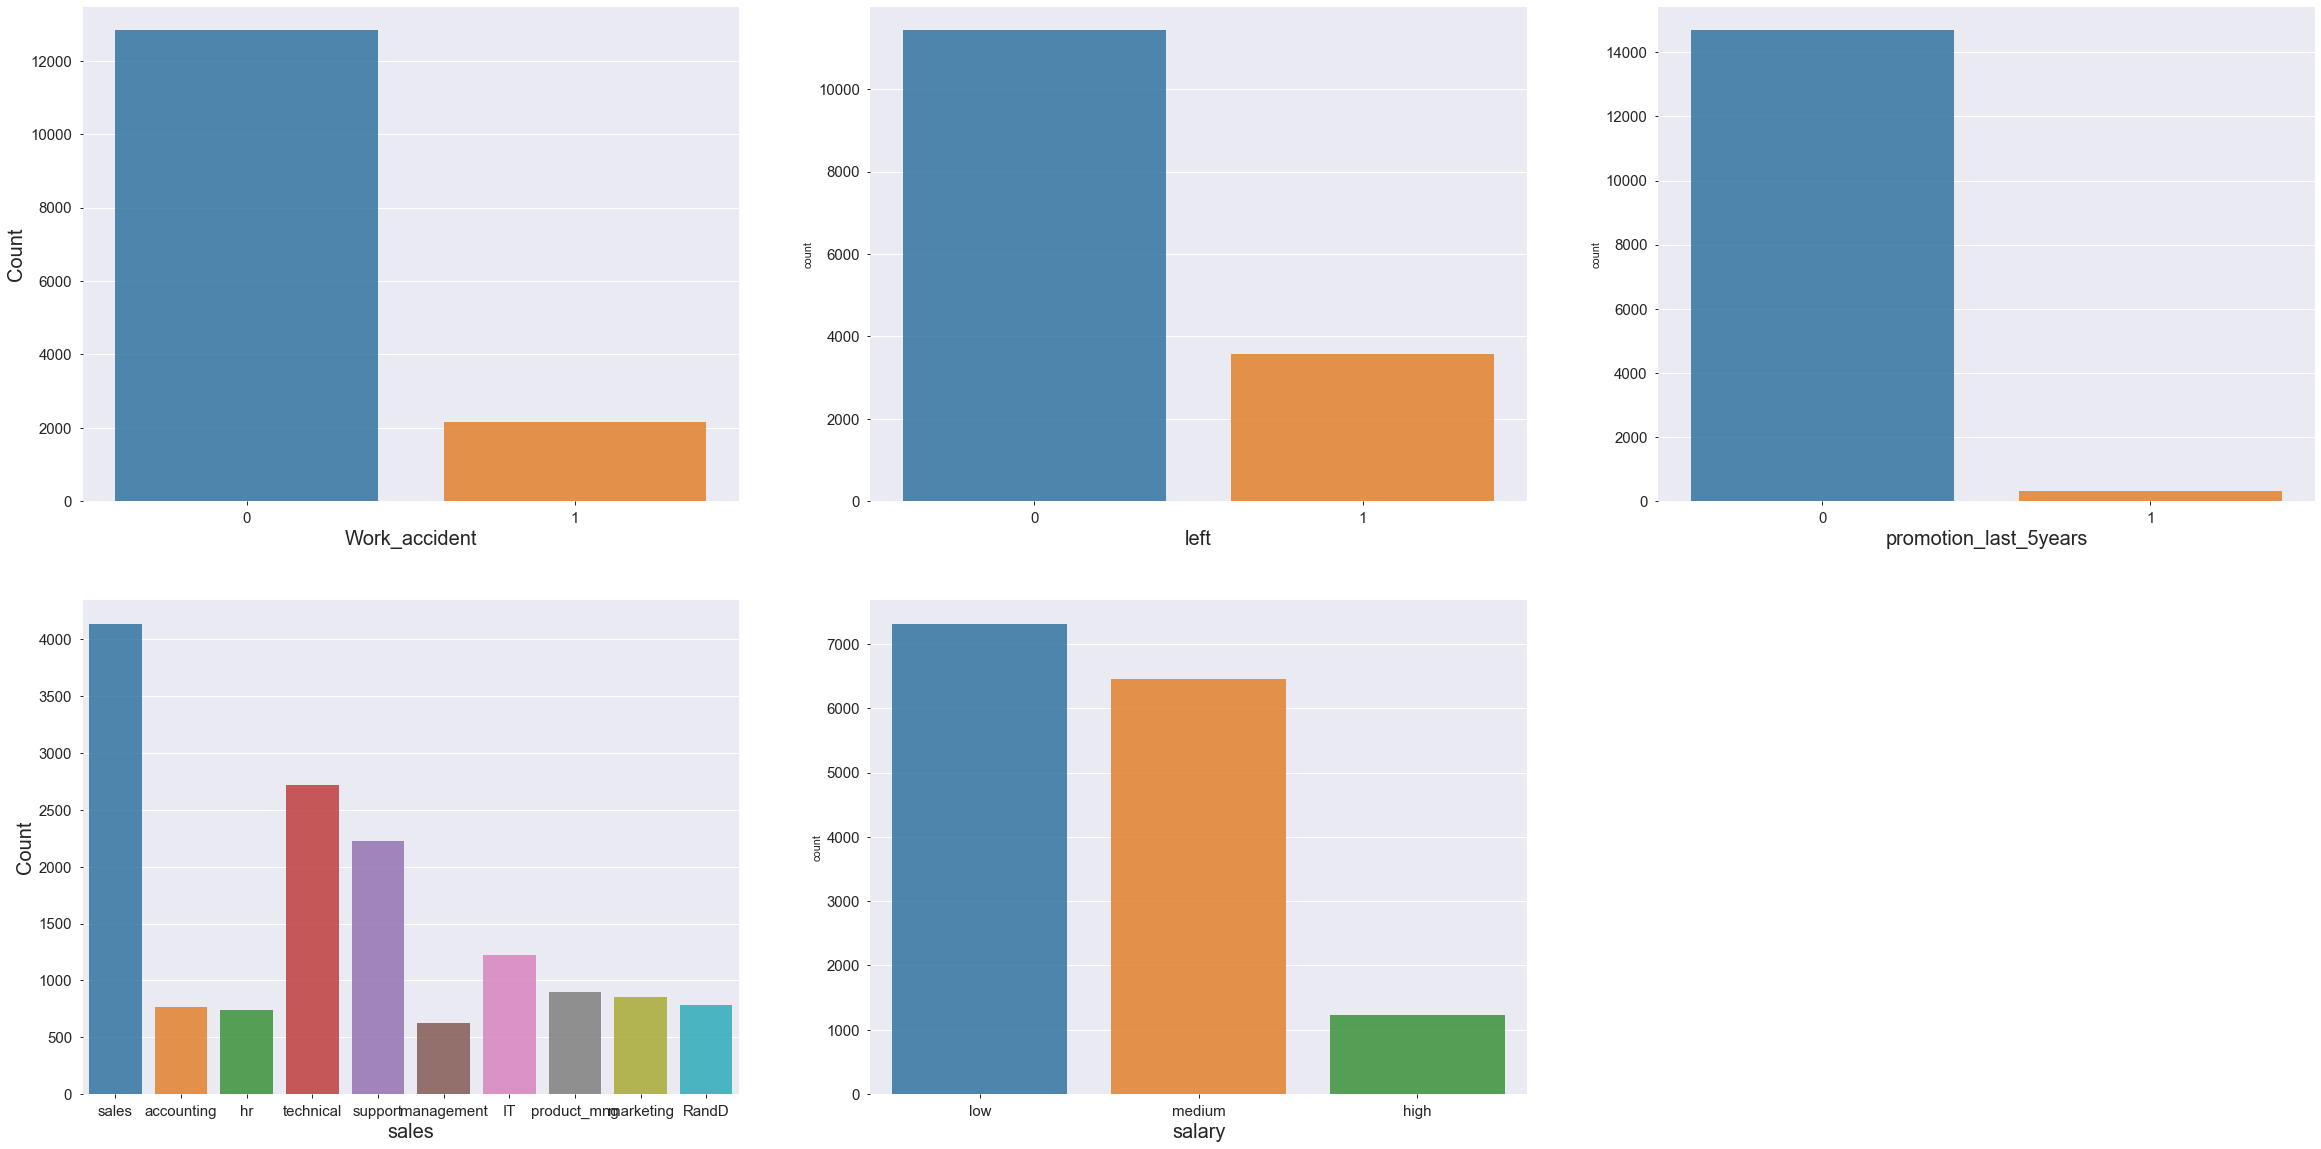

In [12]:
fig = plt.figure(figsize = (40,20))
ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = data, x = 'Work_accident', ax=ax1, alpha=0.85)
ax1.set_xlabel("Work_accident",fontsize=20)
ax1.set_ylabel("Count",fontsize=20)
ax1.tick_params(labelsize=15)
ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = data, x = 'left', ax=ax2, alpha=0.85)
ax2.set_xlabel("left",fontsize=20)
ax2.tick_params(labelsize=15)
ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = data, x = 'promotion_last_5years', ax=ax3, alpha=0.85)
ax3.set_xlabel("promotion_last_5years",fontsize=20)
ax3.tick_params(labelsize=15)
ax4 = fig.add_subplot(2,3,4)
sns.countplot(data = data, x = 'sales', ax=ax4, alpha=0.85)
ax4.set_xlabel("sales",fontsize=20)
ax4.set_ylabel("Count",fontsize=20)
ax4.tick_params(labelsize=15)
ax5 = fig.add_subplot(2,3,5)
sns.countplot(data = data, x = 'salary', ax=ax5, alpha=0.85)
ax5.set_xlabel("salary",fontsize=20)
ax5.tick_params(labelsize=15);

The main insights here to keep in mind would be:

   - There were very few promotions in the last 5 years;
   - The departments with the most employees are the Sales, Technical, and Support ones;
   - The majority of employees have a low salary.

To be able to make more sense of the data, it helps in comparing numerical variables in combination with categorical ones, which I do next. I will focus the most on understanding the other variables in relation to whether the employee left or.

### 1.6 Combining variables for a better understanding

Here we try to plotting many variables in comparison to the "left" variable to try to find interesting patterns that could guide our analysis.

#### A. Salaries level and promotions compared to leaving rates

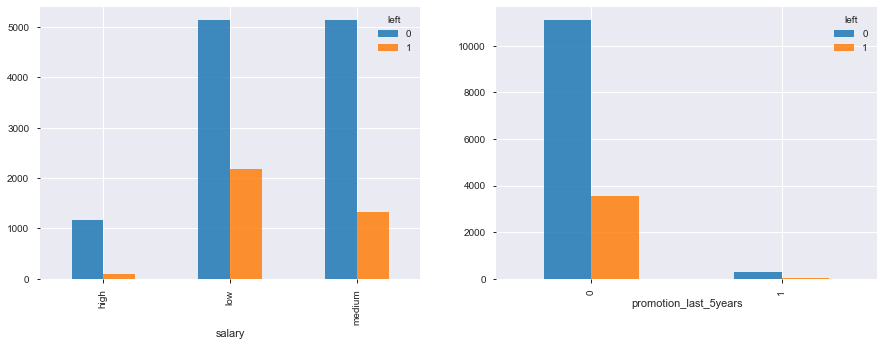

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
pd.crosstab(data.promotion_last_5years, data.left).plot(kind='bar',ax=ax[1], alpha=0.85);
pd.crosstab(data.salary, data.left).plot(kind='bar',ax=ax[0], alpha=0.85);

Observation: 

- The employees with low or medium salaries are the one that most probably leave the company;
- As expected, the majority of employees who left are mainly the ones not having received promotions in the last 5 years.

#### B. Satisfaction and leaving rates

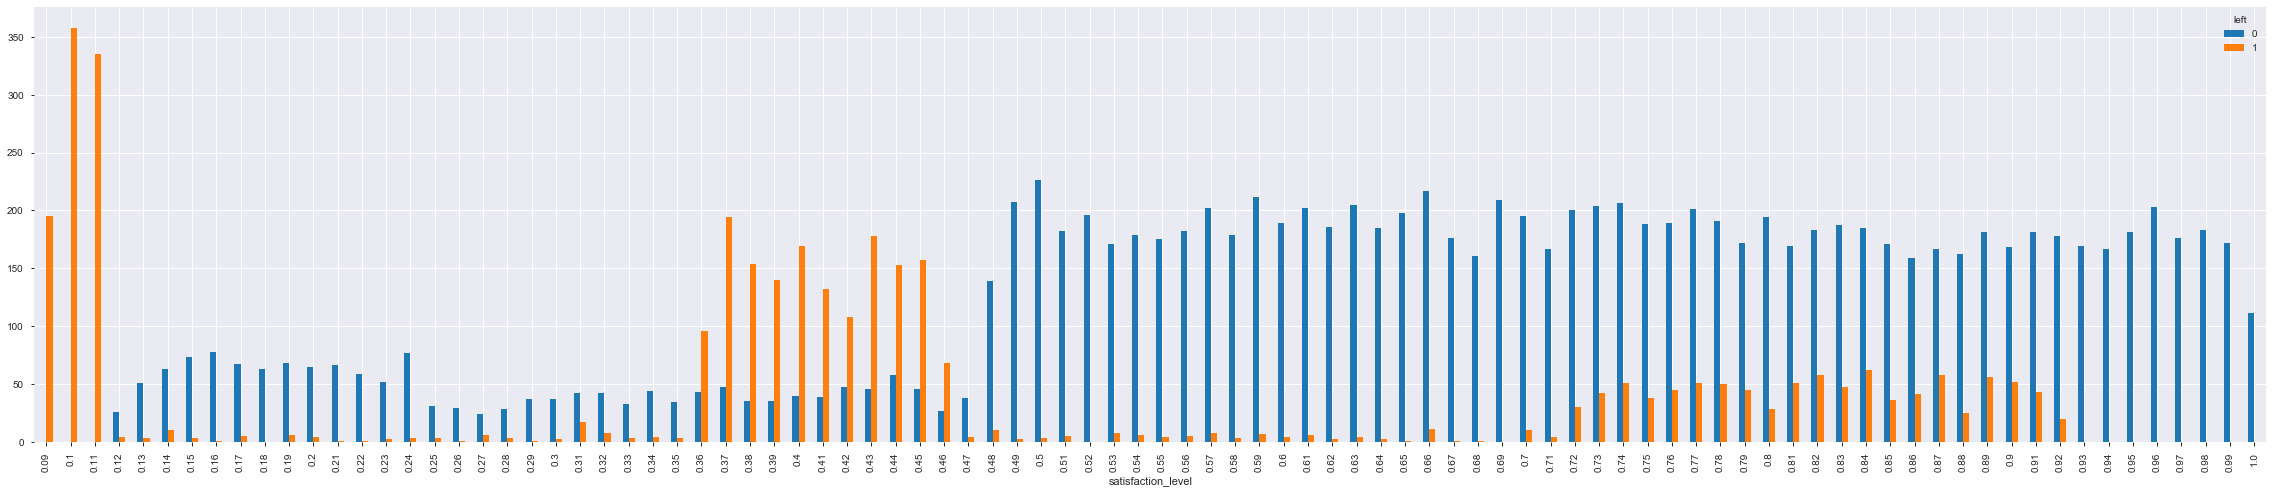

In [14]:
pd.crosstab(data.satisfaction_level, data.left).plot(kind='bar', figsize=(40,8));

Observation: 

- We see interesting patterns here with kind of 3 groups of employees who left: the highly dissatisfied ones, some that are averagely dissatisfied and a small group that seemsed satisfied. 
- These distributions contrast with the one of satisfied employees: for them, they mainly are satisfied with a constant distribution. 

#### C. Departments, work accidents and leaving rates

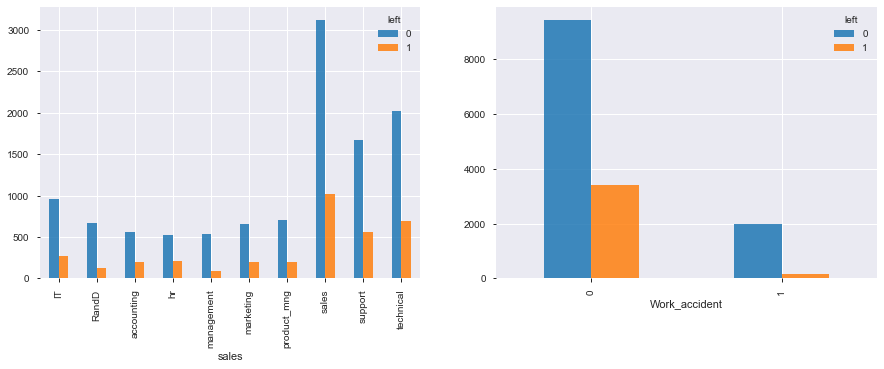

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
pd.crosstab(data.sales, data.left).plot(kind='bar',ax=ax[0], alpha=0.85);
pd.crosstab(data.Work_accident, data.left).plot(kind='bar',ax=ax[1], alpha=0.85);

Observation: 

- There does not seem to be a clear relationship or distribution here.

#### D. Evaluations and leaving rates

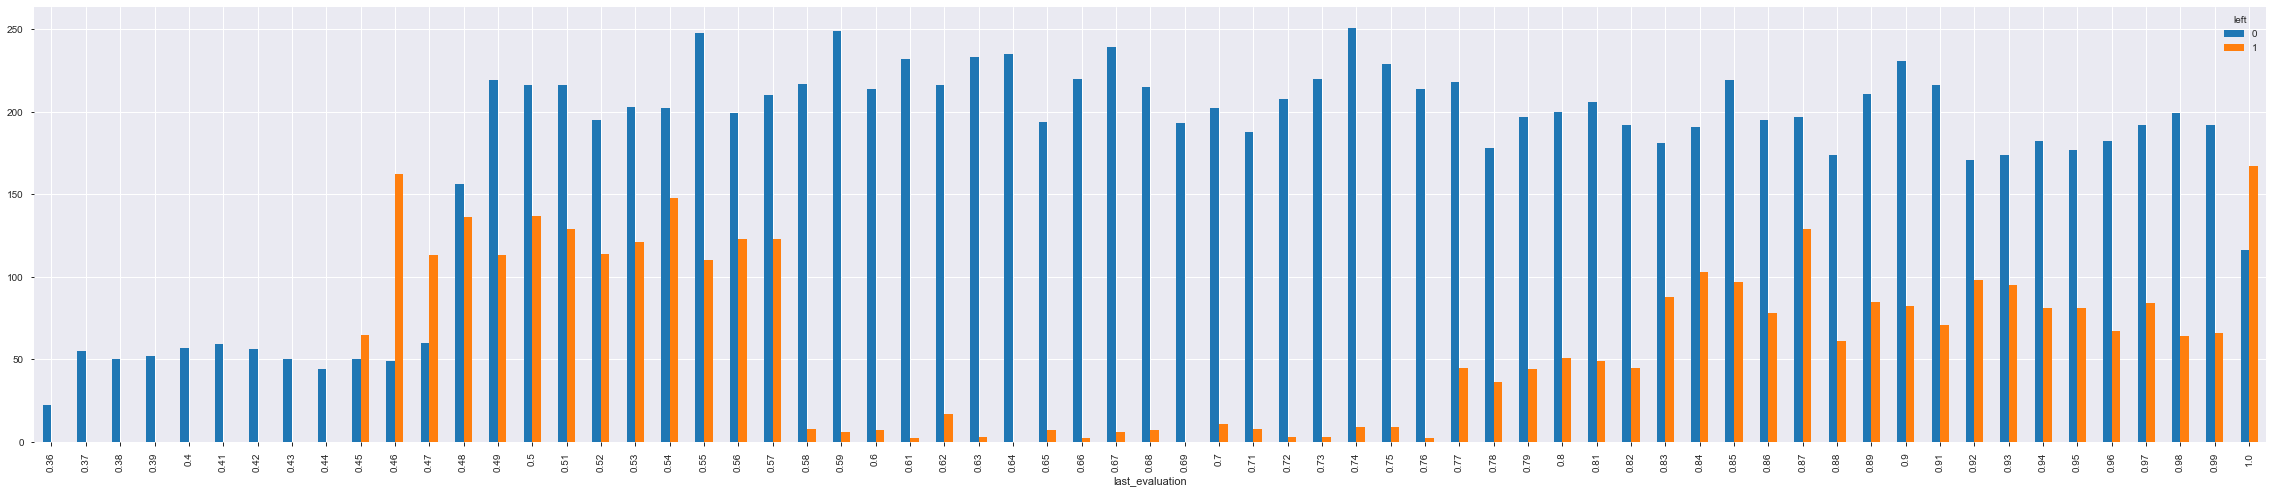

In [16]:
pd.crosstab(data.last_evaluation, data.left).plot(kind='bar', figsize=(40,8));

Observation: 

- We could say here that we have 2 groups of people leaving: those that were evaluated as below average and those that could be considered performant or evaluated above average. Another interesting insight here is that most of the ones with a maximum evaluation (1.0) have left the company. It seems to be an important variable to keep in mind.

#### E. Number of projects and time spent at the company to leaving rates

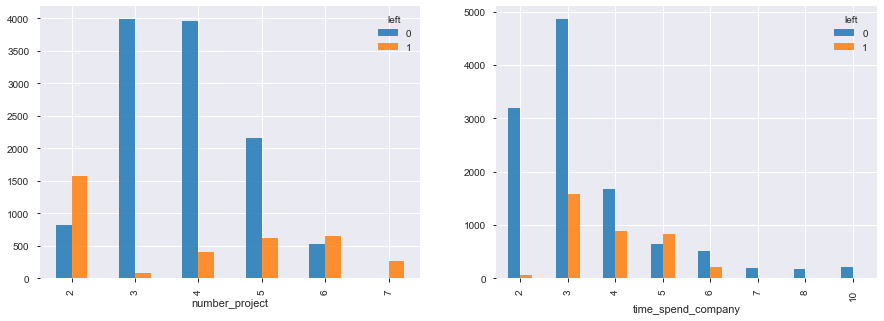

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
pd.crosstab(data.number_project, data.left).plot( kind='bar',ax=ax[0], alpha=0.85);
pd.crosstab(data.time_spend_company, data.left).plot( kind='bar',ax=ax[1], alpha=0.85);

Observations: 

- The employees that worked 2 projects and those that worked on 6 or 7 projects are more likely to have left the company;
- Employees with more than 6 years of experience tend not to leave the company. This is a bit similar to those with 2 years of experience.

#### F. Average monthly hours worked and leaving rates

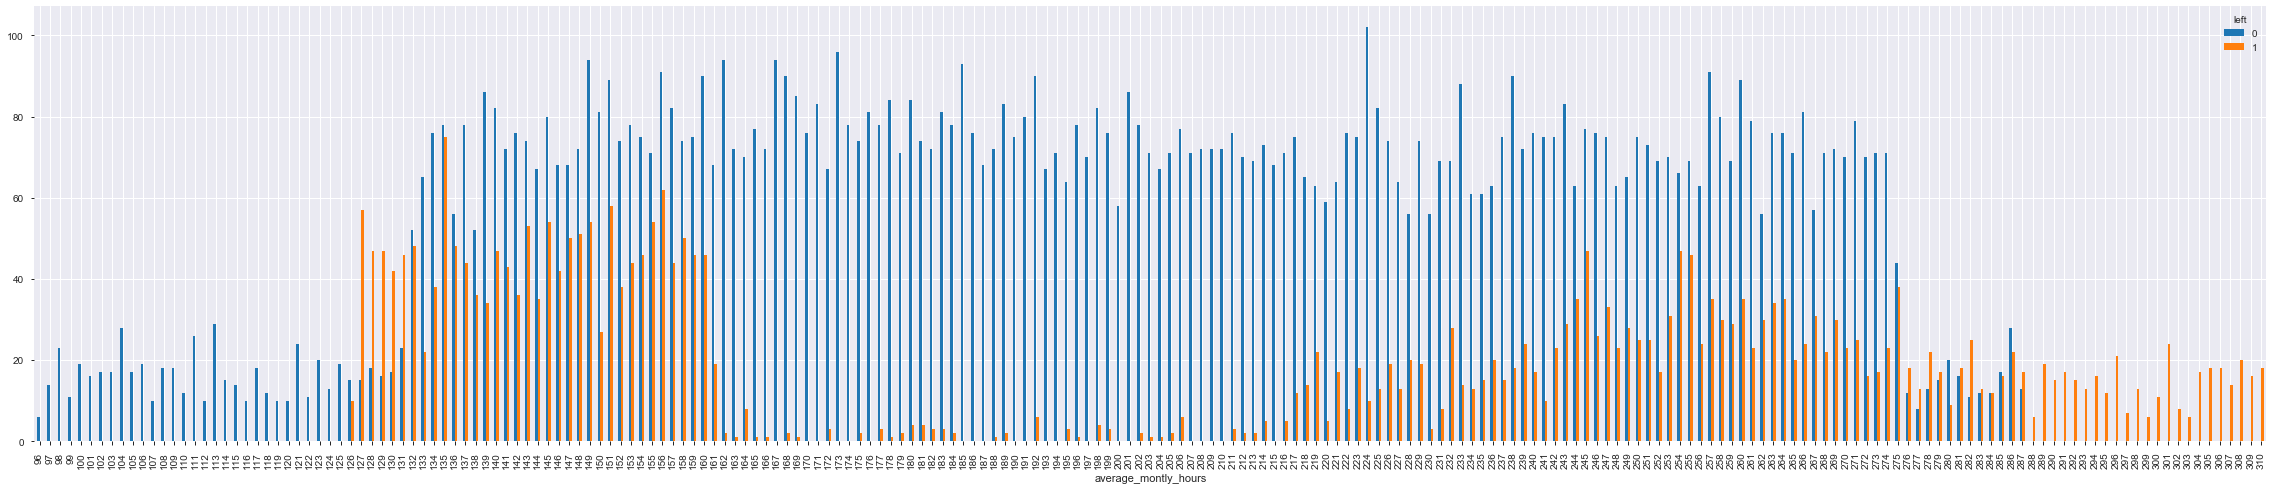

In [18]:
pd.crosstab(data.average_montly_hours, data.left).plot(kind='bar', figsize=(40,8));

Observation: again here there seem to be a polarization of the distribution of employees who left the company into 2 groups: the ones that worked relatively below average and the ones that worked considerably much and also the ones that worked the most. This seems to be an important variable here.

### 1.6.1 The preliminary examination's main take aways

The main take aways from these visualization that could help us later on would be:

- People with low salaries are the most susceptible to leave;
- There were very few promotions in the last 5 years, and most of those who left did not get promoted;
- The most unsatisfied employees have left the company. But there also is a group of employees who was satisfied and still left;
- The effects of having a work accident or working for a certain department do not seem to have a significant impact on leaving or not;
- The employees who left were mostly either evaluated as below average (less than 0.57/1) or above average (more than 0.77/1);
- The employees working on 2 or more than 5 projects have the higher tendency to leave;
- The employess who have worked from 3 to 5 years have the highest tendency to leave;
- A part of the employees working the most hours in the company are likely to leave;
- There does not seem to be any established linear relationship with the leaving rate of employees.

Thus we could already map an arbitrary guide on which variables seem the most important to take into consideration when it comes to determining who left the company:

- The seemingly important variables: salaries, satisfaction, promotions, evaluations, number of projects, time spent at the company, and hours worked;
- The seemingly less important variables: department, and work accident 

### 1.7 The variables' correlation

To be able to make stronger observations, it helps to plot the correlation between the variables:

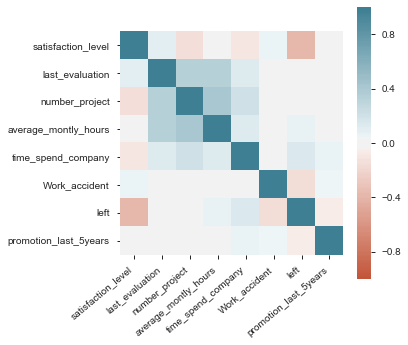

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
corr = data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,horizontalalignment='right');

Observation:

- As expected, the satisfaction shows the strongest correlation with the left variable;
- And we also see poor correlation with the other variables.

As a conclusion, given that no variables are highly correlated, when building the baseline model, it would make sense to keep them at first.

### 1.8 Outlier detection

An important information to keep in mind for the modeling part later on would be the presence of outliers in the dataset. Here we plot the numerical variables to see which ones present outliers:

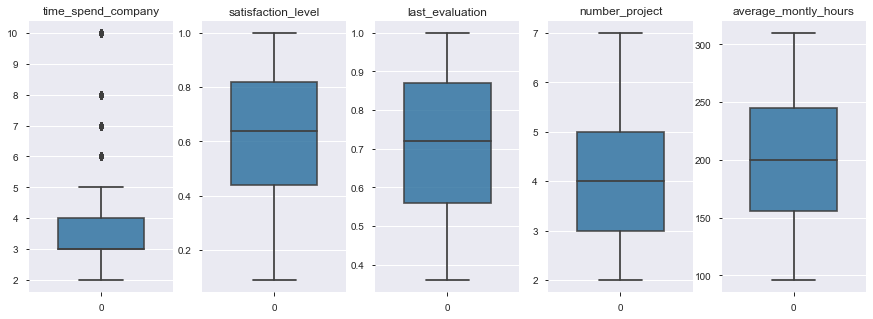

In [21]:
fig, ax = plt.subplots(ncols=5, figsize=(15,5))
sns.boxplot(data=data.time_spend_company, ax=ax[0], boxprops=dict(alpha=0.85), width=0.6).set_title("time_spend_company");
sns.boxplot(data=data.satisfaction_level, ax=ax[1], boxprops=dict(alpha=0.85),width=0.6).set_title("satisfaction_level");
sns.boxplot(data=data.last_evaluation, ax=ax[2], boxprops=dict(alpha=0.85),width=0.6).set_title("last_evaluation");
sns.boxplot(data=data.number_project, ax=ax[3], boxprops=dict(alpha=0.85),width=0.6).set_title("number_project");
sns.boxplot(data=data.average_montly_hours, ax=ax[4], boxprops=dict(alpha=0.85),width=0.6).set_title("average_montly_hours");


Observation:

- We see clear outliers in the variable time_spend_company, which we should keep in mind for later on as a step to improve the baseline model.

# 2. Data Preparation

### 2.1 Refactoring to the proper data types

As we saw in the EDA, the data has no null values thus we do not need to impute anything. 
We can directly focus on making sure we havve the proper data types.

#### A. The variable salary
We start with the salary variable which is set as a categorical variable. Transforming the categorical variable into a numerical one will make it understandable by the different modules in Scikit Learn:

In [26]:
#I create a new dataset dataP on which I will do the transformations:
dataP=data.copy()
#I use this line to create the numerical categories:
dataP['salary'] = dataP['salary'].map({'low': 0, 'medium': 1, 'high':2})

We see that this transformation creates the salary_cat column with the salaries encoded as 0,1, and 2s.

#### B. The variable sales (departments)

The sale variable should also be changed into a numerical variable that the model will be able to interpret. We do this by creating columns for each department with 0s and 1s:

In [27]:
#I use the get_dummies to encode the 0s and 1s:
departments = pd.get_dummies(dataP["sales"])
#I add a prefix to make the data more understandable later on:
departments = departments.add_prefix('dept_')
#I can also here drop the old column:
dataP = dataP.drop(["sales"], axis=1)
#I join the 2 tables:
dataP = dataP.join(departments)

The other variables seem to be properly encoded, we thus turn to scaling and fixing the skewness.

### 2.2 Fixing scales and skewness

#### A. Scaling with MinMaxScaler

For fixing the scale of my data, I decided to use the MinMaxScaler from scikit-learn:

In [28]:
#I assign the minmaxscaler from the library:
mm_scaler = preprocessing.MinMaxScaler()
#I apply it to the dataframe:
num2 = mm_scaler.fit_transform(numerical)
# I take the names from the dataframe containing the numerical variables:
col_names = list(numerical.columns)
#I reassign the names to the columns
num2 = pd.DataFrame(num2, columns=col_names)
#we can see the if the values are scaled:
num2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.318681,0.265625,0.0,0.285047,0.125
1,0.780220,0.781250,0.6,0.775701,0.500
2,0.021978,0.812500,1.0,0.822430,0.250
3,0.692308,0.796875,0.6,0.593458,0.375
4,0.307692,0.250000,0.0,0.294393,0.125


It looks like the data was appropriately scaled. Let's not try to fix the skewness.

#### B. A solution for the skeweness (from the Dataset library)

I have decided not to load the Dataset library because it conflicted with the libraries I had already used in the notebook. I found a way around it which is to define the functions I would like to use from the library in my script and run it locally without calling the library. Here, I thus define the skewed_features function that I use from the Dataset library (https://github.com/renero/dataset/blob/master/dataset/dataset.py) and then apply it to my data.

In [29]:
    def skewed_features(df, threshold=0.75, fix=False, return_series=True):
        feature_skew = df.apply(
            lambda x: skew(x)).sort_values(ascending=False)
        if fix is True:
            high_skew = feature_skew[feature_skew > threshold]
            skew_index = high_skew.index
            for feature in skew_index:
                df[feature] = boxcox1p(
                    df[feature], boxcox_normmax(df[feature] + 1))
            feature_skew = df.apply(
            lambda x: skew(x)).sort_values(ascending=False)
        if return_series is True:
            return feature_skew
        
# NOTE: I adapted the code from the original one copied. I added the "feature_skew = df.apply(
#            lambda x: skew(x)).sort_values(ascending=False)" in the for loop because it was not returning me the proper 
#            series after fixing it but it was actually fixed. And I changed the "self" to df and also removed the "features" 
#            from df.features[feature] because it was giving me an error.
#Here are insights from the documentation:
# - It returns the list of numerical features that present skewness;
# - threshold: The limit over which considering that the "skew()"" return value is considered a skewed feature;
# - fix: (Default: False) Boolean indicating whether or not fixing the skewed features.
        # If True, those with values above thethreshold will be fixed using BoxCox;
# - return_series: (Default: True) Boolean indicating whether returning the features (pandas DataFrame) that present skewness.

I first call the function to see which variables present skewness:

In [30]:
skewed_features(num2)

time_spend_company      1.853134
number_project          0.337672
average_montly_hours    0.052837
last_evaluation        -0.026619
satisfaction_level     -0.476313
dtype: float64

The only variable that seems skewed here is time_spend_company (above the 0.75 treshold set in the function). I thus now call the function again but this time with the fix parameter set as True:

In [31]:
skewed_features(num2, fix=True)

number_project          0.337672
time_spend_company      0.270628
average_montly_hours    0.052837
last_evaluation        -0.026619
satisfaction_level     -0.476313
dtype: float64

We now see that the variable is fixed and all variables are not highly skewed. We can verify that the transformation was effective by plotting histograms before and after the transformation:

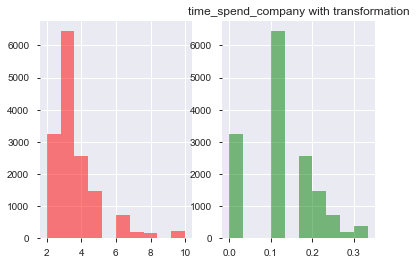

In [33]:
fig, ax = plt.subplots(1,2,figsize=(6,4))
ax[0].hist(dataP["time_spend_company"], alpha = 0.5, color = 'r')
ax[1].hist(num2["time_spend_company"], alpha = 0.5, color = 'g')
plt.title("time_spend_company with transformation")
plt.show()

### 2.3 Spliting into train and test: Cross Validation approach

I have decided to use the method supplied by the scikit-learn library. Here are the steps I've taken:

#### A. Building the dataframes we will use in the baseline model
I join the num2 dataframe and the dataP dataframe which contains both transformations into a final transformed dataframe that I called dataTr;

In [248]:
dataTr = dataP.drop(['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'], axis=1)
dataTr = dataTr.join(num2)

#### B. Setting the dataset into X and y


So here I split the dataset into two different ones, one for the independent variables (X), and one for the dependent variable (y) which is the "left" column:

In [35]:
y = dataTr["left"]
dataTr.drop('left', inplace=True, axis=1)

#### C. Cross-Validation approach

I have decided to use the scikit-learn library's functions to perform the cross validation. In specific, I will be using the KFold method. This is made easier with the function cross_val_score. I define here a function that I will be calling later on to evaluate my baseline model as well as all the models in the feature engineering steps:

In [36]:
def cv(X,y):
    print();print(format('Cross Validation:','*^82'))
    model = LogisticRegression()
    skf = StratifiedKFold(shuffle=True, n_splits=10)
    # Cross-validating the model using the F1 measure:
    print();print("The array of 10-folds F1 scores is:"); print(cross_val_score(model, X, y, scoring="f1", cv = skf))
    mean_score = cross_val_score(model, X, y, scoring="f1", cv = skf).mean()
    std_score = cross_val_score(model, X, y, scoring="f1", cv = skf).std()
    print();print("The mean F1 score is:"); print(mean_score)
    print();print("The standard deviation of this score is:"); print(std_score)
    prediction = cross_val_predict(model,X,y)
    print();print("Table of metrics:");print(classification_report(y, prediction))

I can now proceed to the baseline model.

### 3. Baseline Model

I can now tun the Logistic Regression for the baseline model that I defined in the previous cell:

In [37]:
cv(dataTr,y)


********************************Cross Validation:*********************************

The array of 10-folds F1 scores is:
[0.49832776 0.46808511 0.48040886 0.46333333 0.47840532 0.44827586
 0.50170648 0.47266314 0.4664311  0.45811966]

The mean F1 score is:
0.47128610168298923

The standard deviation of this score is:
0.023359839717584024

Table of metrics:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     11428
           1       0.58      0.39      0.47      3571

    accuracy                           0.79     14999
   macro avg       0.70      0.65      0.67     14999
weighted avg       0.77      0.79      0.77     14999



We see that the F1 score for the attrition is 0.47. The goal now would be to increase this number with the help of feature engineering which we now turn to.

### 4. Feature Engineering

### 4.1 Feature Creation 

I start by trying to create new features from the available ones and assess if they improve the baseline model or not:

#### A. Average hours per project
I try first to divide average monthly hours by the number of projects to get an average hours worked on a certain project to see if it has an effect on the baseline model:

In [38]:
#I will work with a copy of the prepared dataset:
dataFC=dataP.copy()
#I compute the newly added feature:
dataFC['avg_hours_project'] = dataP['average_montly_hours']/dataP['number_project']
dataFC.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,avg_hours_project
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,78.500000
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,52.400000
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,38.857143
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,44.600000
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,79.500000


In [39]:
# Given that I had to use the non scaled data to perform the division, I reapply the same steps taken before:
numerical2=dataFC[['avg_hours_project','satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]
# Fixing the scaling:
num3 = mm_scaler.fit_transform(numerical2)
col_names = list(numerical2.columns)
num3 = pd.DataFrame(num3, columns=col_names)
# Fixing the skewness:
skewed_features(num3, fix=True)

number_project          0.337672
time_spend_company      0.270628
average_montly_hours    0.052837
avg_hours_project      -0.010948
last_evaluation        -0.026619
satisfaction_level     -0.476313
dtype: float64

In [40]:
# Adding the fixed data to the main dataframe:
dataFC = dataFC.drop(['avg_hours_project','satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'], axis=1)
dataFC = dataFC.join(num3)

In [41]:
# Spliting the dataset
y = dataFC["left"]
dataFC.drop('left', inplace=True, axis=1)

In [42]:
# Running the model:
cv(dataFC, y)


********************************Cross Validation:*********************************

The array of 10-folds F1 scores is:
[0.52173913 0.52512156 0.52667814 0.51965812 0.5360134  0.52922078
 0.48667851 0.51839465 0.51926298 0.50825083]

The mean F1 score is:
0.5185989810462251

The standard deviation of this score is:
0.02570793026342987

Table of metrics:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     11428
           1       0.61      0.44      0.51      3571

    accuracy                           0.80     14999
   macro avg       0.72      0.68      0.69     14999
weighted avg       0.78      0.80      0.79     14999



Just by undertaking this simple step, we see an overall improvement of the F1 score for the attrition prediction from 0.47 to 0.52.  

#### B. Satisfaction / Time spent in the company

Another interesting measure would be the satisfaction of the employees over the time they've spent in the company. I again use the same steps as in A. and get the following results:

In [43]:
#I will work with a copy of the prepared dataset:
dataFC2=dataP.copy()
#I compute the newly added feature:
dataFC2['satisf_time'] = dataP['satisfaction_level']/dataP['time_spend_company']

In [44]:
# Given that I had to use the non scaled data to perform the division, I reapply the same steps taken before:
numerical2=dataFC2[['satisf_time','satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]
# Fixing the scaling:
num3 = mm_scaler.fit_transform(numerical2)
col_names = list(numerical2.columns)
num3 = pd.DataFrame(num3, columns=col_names)
# Fixing the skewness:
skewed_features(num3, fix=True)

satisf_time             0.462494
number_project          0.337672
time_spend_company      0.270628
average_montly_hours    0.052837
last_evaluation        -0.026619
satisfaction_level     -0.476313
dtype: float64

In [45]:
# Adding the fixed data to the main dataframe:
dataFC2 = dataFC2.drop(['satisf_time','satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'], axis=1)
dataFC2 = dataFC2.join(num3)

In [46]:
# Spliting the dataset
y = dataFC2["left"]
dataFC2.drop('left', inplace=True, axis=1)

In [47]:
# Running the model:
cv(dataFC2,y)


********************************Cross Validation:*********************************

The array of 10-folds F1 scores is:
[0.54634146 0.54281099 0.54187192 0.5266559  0.54692557 0.5083612
 0.5615142  0.5320197  0.53399668 0.57492355]

The mean F1 score is:
0.5382718238898353

The standard deviation of this score is:
0.01797301519778569

Table of metrics:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87     11428
           1       0.57      0.48      0.52      3571

    accuracy                           0.79     14999
   macro avg       0.71      0.68      0.69     14999
weighted avg       0.78      0.79      0.78     14999



This newly computed feature elevate the performance of the model to 0.54, which is also slightly better than the last best score.

#### C. Adding the 2 newly created features together

I was wondering what would the behavior of adding these 2 derived features in a model be. I thus run a model with both of these added:

In [55]:
#I will work with a copy of the prepared dataset:
dataFC3=dataP.copy()
#I compute the newly added feature:
dataFC3['satisf_time'] = dataP['satisfaction_level']/dataP['time_spend_company']
dataFC3['avg_hours_project'] = dataP['average_montly_hours']/dataP['number_project']

In [49]:
# Given that I had to use the non scaled data to perform the division, I reapply the same steps taken before:
numerical2=dataFC3[['avg_hours_project','satisf_time','satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]

# Fixing the scaling:
num3 = mm_scaler.fit_transform(numerical2)
col_names = list(numerical2.columns)
num3 = pd.DataFrame(num3, columns=col_names)

# Fixing the skewness:
skewed_features(num3, fix=True)

satisf_time             0.462494
number_project          0.337672
time_spend_company      0.270628
average_montly_hours    0.052837
avg_hours_project      -0.010948
last_evaluation        -0.026619
satisfaction_level     -0.476313
dtype: float64

In [50]:
# Adding the fixed data to the main dataframe:
dataFC3 = dataFC3.drop(['avg_hours_project','satisf_time','satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'], axis=1)
dataFC3 = dataFC3.join(num3)

In [51]:
# Spliting the dataset
y = dataFC3["left"]
dataFC3.drop('left', inplace=True, axis=1)

In [52]:
# Running the model:
cv(dataFC3,y)


********************************Cross Validation:*********************************

The array of 10-folds F1 scores is:
[0.57142857 0.56026059 0.59844961 0.57051282 0.57275542 0.53399668
 0.59259259 0.5516129  0.61538462 0.56451613]

The mean F1 score is:
0.5741684355693379

The standard deviation of this score is:
0.02199149496934306

Table of metrics:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     11428
           1       0.60      0.51      0.55      3571

    accuracy                           0.80     14999
   macro avg       0.73      0.70      0.71     14999
weighted avg       0.79      0.80      0.80     14999



The model does indeed perform better when these 2 newly created features are put together.

After trial and error, with some other features, no combinations yielded an improvement to the present model. I thus continue the feature enginnering step keeping in mind those 2 newly derived features.

## 4.2 Outlier Removals

I came across a handy function shared on StackOverflow (https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame) that helps remove the outliers from a dataframe. I use it here on the original prepared data, and rerun the last model I got to see what is the effect of removing outliers at this stage:

In [60]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [61]:
#I will work with a copy of the prepared dataset:
dataFC3=dataP.copy()
#I compute the newly added feature:
dataFC3['satisf_time'] = dataP['satisfaction_level']/dataP['time_spend_company']
dataFC3['avg_hours_project'] = dataP['average_montly_hours']/dataP['number_project']

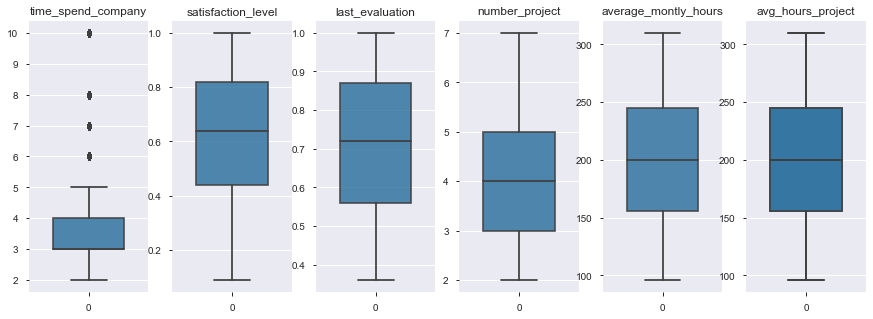

In [65]:
fig, ax = plt.subplots(ncols=6, figsize=(15,5))
sns.boxplot(data=dataFC3.time_spend_company, ax=ax[0], boxprops=dict(alpha=0.85), width=0.6).set_title("time_spend_company");
sns.boxplot(data=dataFC3.satisfaction_level, ax=ax[1], boxprops=dict(alpha=0.85),width=0.6).set_title("satisfaction_level");
sns.boxplot(data=dataFC3.last_evaluation, ax=ax[2], boxprops=dict(alpha=0.85),width=0.6).set_title("last_evaluation");
sns.boxplot(data=dataFC3.number_project, ax=ax[3], boxprops=dict(alpha=0.85),width=0.6).set_title("number_project");
sns.boxplot(data=dataFC3.average_montly_hours, ax=ax[4], boxprops=dict(alpha=0.85),width=0.6).set_title("average_montly_hours");
sns.boxplot(data=dataFC3.average_montly_hours, ax=ax[5], boxprops=dict(alpha=0.85),width=0.6).set_title('satisf_time');
sns.boxplot(data=dataFC3.average_montly_hours, ax=ax[5], boxprops=dict(alpha=0.85),width=0.6).set_title('avg_hours_project');

The only variable presenting outliers is time_spend_company, thus I apply the function to get a new dataset:

In [105]:
dataFC3=remove_outlier(dataFC3, "time_spend_company")
dataFC3 = dataFC3.dropna()
dataFC3 = dataFC3.reset_index(drop=True)

In [106]:
dataNO=dataFC3.copy()
numerical= dataNO[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','satisf_time','avg_hours_project']]
#I assign the minmaxscaler from the library:
mm_scaler = preprocessing.MinMaxScaler()
#I apply it to the dataframe:
num2 = mm_scaler.fit_transform(numerical)
# I take the names from the dataframe containing the numerical variables:
col_names = list(numerical.columns)
#I reassign the names to the columns
num2 = pd.DataFrame(num2, columns=col_names)
dataNO = dataNO.drop(['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company','satisf_time','avg_hours_project'], axis=1)
dataNO = dataNO.join(num2)

In [107]:
y = dataNO["left"]
dataNO.drop('left', inplace=True, axis=1)

In [108]:
cv(dataNO,y)


********************************Cross Validation:*********************************

The array of 10-folds F1 scores is:
[0.67381317 0.63206107 0.6547619  0.69738863 0.66055046 0.61943987
 0.67412141 0.64228935 0.67459138 0.64596273]

The mean F1 score is:
0.6594133598932838

The standard deviation of this score is:
0.015595160300561527

Table of metrics:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     10355
           1       0.68      0.62      0.65      3362

    accuracy                           0.84     13717
   macro avg       0.78      0.77      0.77     13717
weighted avg       0.83      0.84      0.83     13717



Removing outliers did improve the F1 score significantly to 0.65 as compared to 0.47 for 1s. I thus decide to continue the next steps with this dataset.

## 4.3 Feature selection
By applying feature selection, I try to reduce the number of input variables to the ones that are potentially the most useful to my model when it has to predict the target variable.
This is even more relevant here because my transformations led to a high number of dimensions. I expect some features to be irrelevant or maybe less significant to the dependent variable and so removing them would decrease complexity, and make a more robust model.

I first start with wraper methods and I will use the mlxtend library that already contains built-in implementations for most of the feature selection techniques. (As a reference on the usage and interpretation of these methods I used: https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f)

#### A. Stepwise Selection: Forward Selection

Here the method starts with no variables and then starts fitting the model with every individual feature. The process is then repeated again and again by trying combinations of features previously selected with all other remaining features.

In [109]:
# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),k_features=(1,20), forward=True,floating=False, scoring = 'f1', cv = 5)

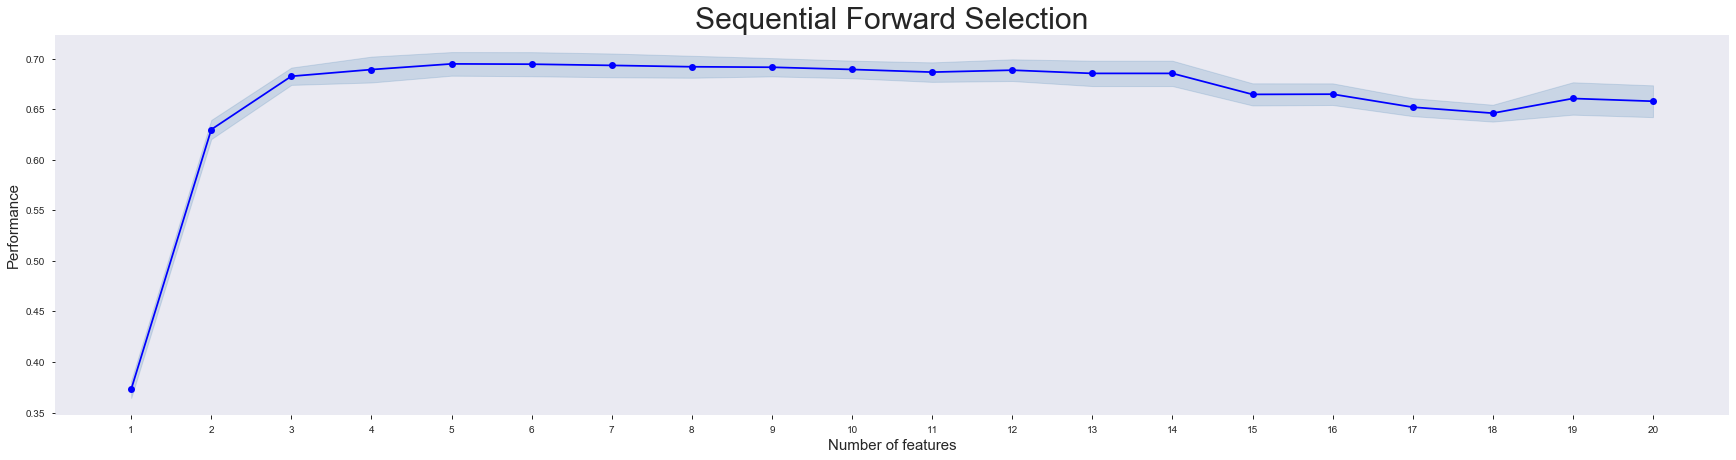

In [110]:
sfs.fit(dataNO, y)
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev',figsize = (30,7))
plt.grid()
plt.title('Sequential Forward Selection', fontsize=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Number of features', fontsize=15)
plt.ylabel('Performance', fontsize=15)
plt.show()

In [116]:
sfs.k_feature_names_

('Work_accident',
 'promotion_last_5years',
 'dept_RandD',
 'number_project',
 'satisf_time')

The sequential Fackward Selection plot seems to highlight that 5 features could be selected and will yield the highest score.

#### B. Stepwise Selection: Backward Elimination

In here the method starts with the full model and then repeatedly removes the insignificant feature until it keeps only the significant ones.

In [111]:
#Sequential backward selection(sbs)
sbs = SFS(LogisticRegression(), k_features=(3,20), forward=False, floating=False,cv=5, scoring='f1')

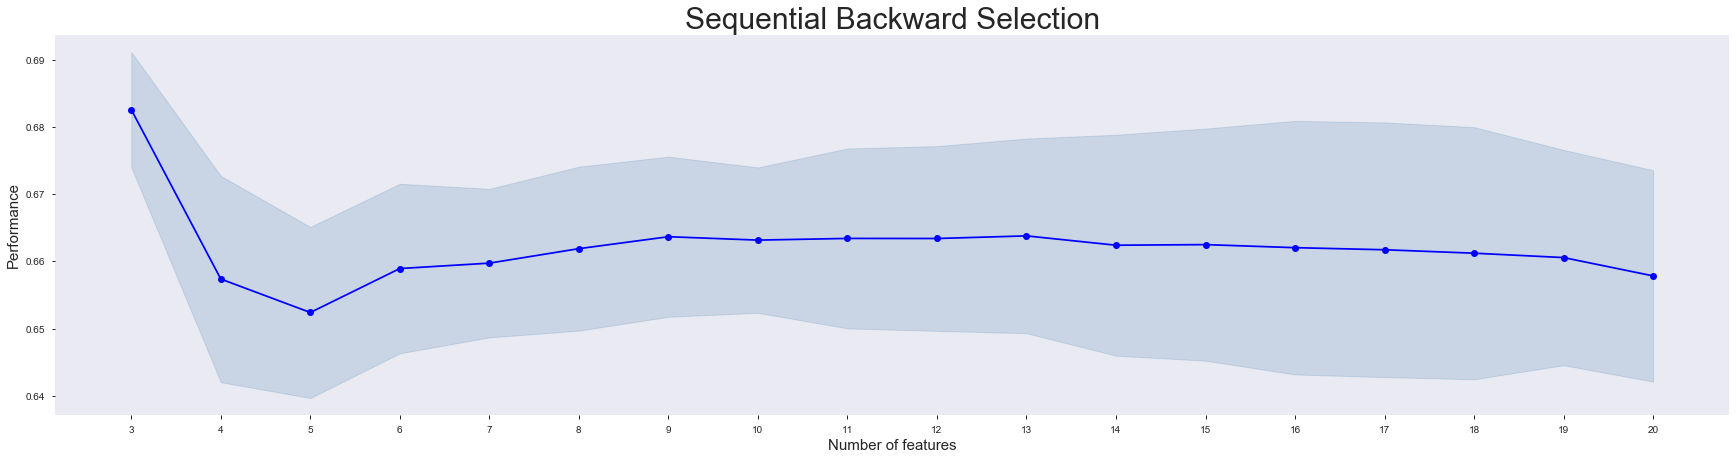

In [112]:
sbs.fit(dataNO,y)
fig1 = plot_sfs(sbs.get_metric_dict(), kind='std_dev',figsize = (30,7))
plt.grid()
plt.title('Sequential Backward Selection', fontsize=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Number of features', fontsize=15)
plt.ylabel('Performance', fontsize=15)
plt.show()

In [113]:
sbs.k_feature_names_

('Work_accident', 'number_project', 'satisf_time')

The sequential Backward Selection plot seems to highlight that 3 features could be selected and will yield the highest score. However, the improvement seems to be little and I believe that droping the other features at this point would not be a good idea.

#### C. Stepwise Selection: Bi-directional elimination 

The bi-directional elimination method - a wrapper method for feature selection - I use here is similar to forward selection. However, it also in a way combines backward elimination because when it is adding a new feature, at the same time it looks at how significant are the already added feature and if any of the selected features is non-significant, it removes it using backward elimination.

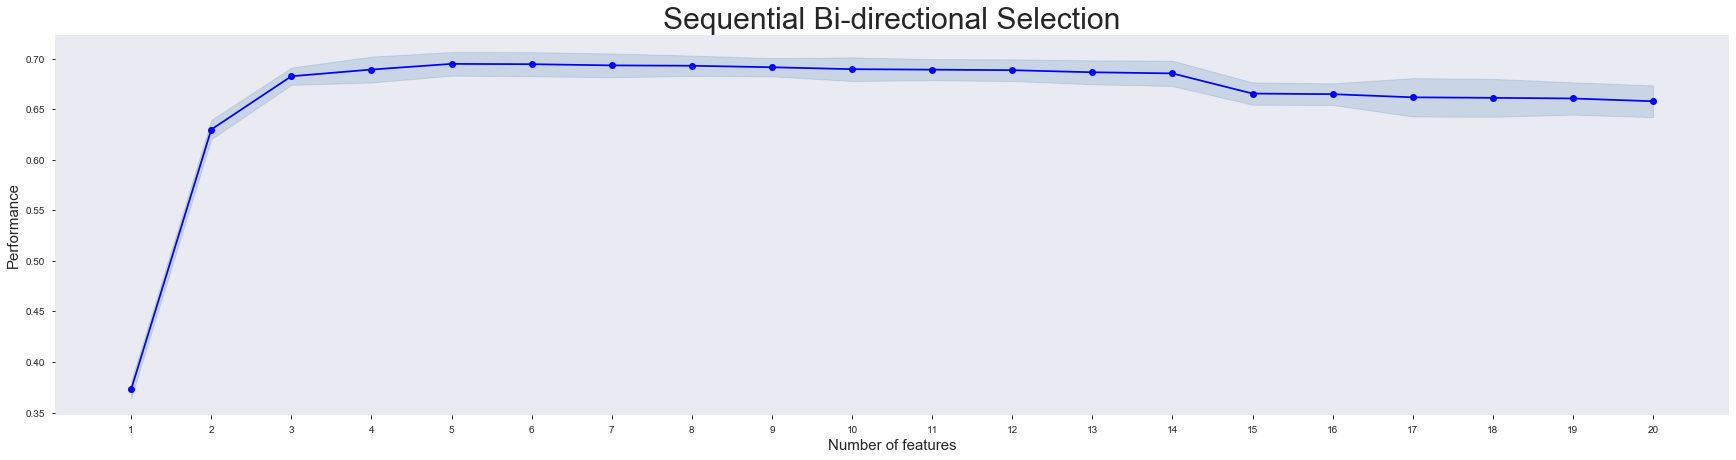

In [114]:
# Sequential Forward Floating Selection(sffs)
sffs = SFS(LogisticRegression(), k_features=(3,20), forward=True, floating=True, cv=5, scoring='f1')
sffs.fit(dataNO, y)
fig1 = plot_sfs(sffs.get_metric_dict(), kind='std_dev',figsize = (30,7))
plt.grid()
plt.title('Sequential Bi-directional Selection', fontsize=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Number of features', fontsize=15)
plt.ylabel('Performance', fontsize=15)
plt.show()

#### D. Recursive Feature Elimination

The RFE here will construct a model over and over while removing features and constructing a model on the features that are left. (I here use the code from https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/)

In [129]:
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 5 attributes
rfe = RFE(model, 5)
rfe = rfe.fit(dataNO, y)
# summarize the selection of the attributes
print(rfe.support_)

[ True  True False False False False False False False False False False
 False  True False False False False  True  True]


Rather than using the RFE here to filter my variables, I am using it to get an insight on which variables it considers the most important as an insight for later on. Here the result is that the 5 most important attributes are: Work_accident, promotion_last_5years, satisfaction_level, satisf_time, avg_hours_project. 

#### E. Conclusions on the Feature Selection Process

Overall, in using the different methods there were no combinations of fewer features that was drastically improving the model. I thus decided not to remove any as I believe they would be necessary in the clustering process that will follow.

## 4.4 Binning and Clustering to create combinations

In [239]:
dataCL=dataNO.copy()
continuous=dataCL[['satisfaction_level','last_evaluation','average_montly_hours','satisf_time','avg_hours_project']]

#### A. Binning First

I have here decided to run clustering to create a feature that would provide more insight to my model. I first bin the 5 continuous numerical variables into 20-smaller equal width bins.

In [240]:
bins = [0, 0.05,0.1,0.15, 0.2,0.25, 0.3,0.35, 0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7,0.75 ,0.8,0.85, 0.9,0.95, 1]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
continuous["bin_satisf"] = pd.cut(dataCL['satisfaction_level'], bins=bins, labels=labels,include_lowest=True)
continuous["bin_eval"]=pd.cut(dataCL['last_evaluation'], bins=bins, labels=labels,include_lowest=True)
continuous["bin_montly"]=pd.cut(dataCL['average_montly_hours'], bins=bins, labels=labels,include_lowest=True)
continuous['bin_sa_time'] = pd.cut(dataCL['satisf_time'], bins=bins, labels=labels,include_lowest=True)
continuous['bin_avg_hours_project'] = pd.cut(dataCL['avg_hours_project'], bins=bins, labels=labels,include_lowest=True)

#I can also here drop the old column:
continuous = continuous.drop(["satisfaction_level","last_evaluation","average_montly_hours",'satisf_time','avg_hours_project'], axis=1)
dataCL = dataCL.drop(["satisfaction_level","last_evaluation","average_montly_hours",'satisf_time','avg_hours_project'], axis=1)
dataCL = dataCL.join(continuous)

#### B. Clustering
Before running the clustering, I had to decide on the number of clusters to choose. I decided to use the silhouette score to make a decision (I used https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py for the implementation of this for loop):

In [237]:
range_n_clusters = [3,6,10,15,20,25,30,35,40,60,80,100]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(dataCL)
    centers = clusterer.cluster_centers_

    score = silhouette_score(dataCL, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 3, silhouette score is 0.2798100744610632)
For n_clusters = 6, silhouette score is 0.32915922270911)
For n_clusters = 10, silhouette score is 0.33011528671260904)
For n_clusters = 15, silhouette score is 0.3624449278410408)
For n_clusters = 20, silhouette score is 0.3970502359950931)
For n_clusters = 25, silhouette score is 0.41047291416083853)
For n_clusters = 30, silhouette score is 0.4230298373713247)
For n_clusters = 35, silhouette score is 0.33844551097614445)
For n_clusters = 40, silhouette score is 0.36634198144514185)
For n_clusters = 60, silhouette score is 0.22727250270398336)
For n_clusters = 80, silhouette score is 0.2004033142162334)
For n_clusters = 100, silhouette score is 0.19122751935445595)


Based on the best silhouette score, which could be used as an indicator of how far away from the neighboring clusters are the different clusters situated (the closer the value is to 1), I thus use 30 clusters in the KMeans I run.

In [241]:
kmeans = KMeans(n_clusters=30)
kmeans.fit(dataCL)
labels = kmeans.predict(dataCL)

In [242]:
dataCL['labels']= labels
dataCL = pd.concat([dataCL, pd.get_dummies(dataCL['labels'],prefix='cluster', prefix_sep='_')], axis=1)

In [243]:
cv(dataCL,y)


********************************Cross Validation:*********************************

The array of 10-folds F1 scores is:
[0.91176471 0.92148148 0.88461538 0.91259259 0.91428571 0.91291291
 0.9098966  0.88467153 0.92330383 0.93037037]

The mean F1 score is:
0.910592577264748

The standard deviation of this score is:
0.008618209411065388

Table of metrics:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     10355
           1       0.91      0.91      0.91      3362

    accuracy                           0.96     13717
   macro avg       0.94      0.94      0.94     13717
weighted avg       0.96      0.96      0.96     13717



The binning and clustering steps have provided the highest score and a one that I find appropriate. I interpret the results and the reasonning behind the clustering here in the Interpretation section that will follow.

## 5. Final metric

The F1 Score was used troughout this analysis. This score is equal to  the weighted average of Precision and Recall; and the final score of the model can be found above in the last run model.

It is: 0.97 (0s F1), 0.91 (1s F1) and 0.96 for the weighted average.

The final set of features are: the original 10 features, with the 2 created ones (average hour per project and satisfaction/time spent company), and the cluster feature as well.

## 6. Interpretation

The core reasonning of my model comes from the distribution of the various features seen in the EDA. The main take away of it was the presence of non linearity in the variables. 
Meaning that if we look at each value independently, there was no clear relationship in the way that if this value was increasing, the proportion of people leaving would increase or decrease.

I believe this meant that there was other variables influencing it. For example looking at satisfaction alone, the number of people leaving increases as it is low then decreases and increases again. This means that anoother variable outside of satisfaction is causing people to leave eventough satisfaction increases. And this relationship is present in all variables. This means that a combination of more variables is more important than one variable alone to predict the attrition rate of employees.

That is the reason I tried first to create new variables that would add insights to my model. And then I decided to use clustering to be able to take a combination of all the variables that would create this new feature that I believe is more meaningful that individual features. And those combinations are able to put groups of people who are similar together and thus this gives the ability to my model to better predict the attrition rate.